Run batch file to download Greenland Ice Sheet solid ice discharge data from [Mankoff and others (2020)](https://doi.org/10.22008/promice/data/ice_discharge/d/v02)

In [ ]:
!cd ../data/discharge/ & discharge_download.bat

Load and subset data to glaciers and parameters of interest

In [39]:
import geopandas as gpd
import xarray as xr

# Get basin names of each glacier from centreline attribute table
glaciers = gpd.read_file("../data/misc/centreline_lines.geojson").glacier.unique()

# Load discharge data and subset by glaciers
d_ds = xr.open_dataset("../data/discharge/discharge_gate.nc", engine="h5netcdf").load()
d_ds = d_ds.where(d_ds.name_Mouginot.isin(glaciers), drop=True)

# Restructure dimensions and coordinates and drop unnecessary variables
d_ds = d_ds.assign_coords(x=d_ds.mean_x, y=d_ds.mean_y, glacier=("gate", glaciers))
d_ds = d_ds.swap_dims({"gate": "glacier"})
d_ds = d_ds[["discharge", "err", "coverage"]]

# Write to disk

d_ds.to_netcdf("../data/discharge/discharge_monthly_1986_2024.nc")
d_ds

<xarray.Dataset> Size: 92kB
Dimensions:    (glacier: 2, time: 2863)
Coordinates:
  * time       (time) datetime64[ns] 23kB 1986-04-15 1986-05-15 ... 2024-04-15
    gate       (glacier) int64 16B 136 207
    x          (glacier) float64 16B 5.551e+05 4.863e+05
    y          (glacier) float64 16B -1.899e+06 -2.425e+06
  * glacier    (glacier) object 16B 'DAUGAARD-JENSEN' 'UNNAMED_UUNARTIT_ISLANDS'
Data variables:
    discharge  (glacier, time) float32 23kB 9.456 9.439 9.831 ... 4.519 4.397
    err        (glacier, time) float32 23kB 0.615 0.6146 ... 0.4196 0.4085
    coverage   (glacier, time) float32 23kB 0.0 0.9748 1.0 ... 0.6457 0.7885
Attributes:
    featureType:      timeSeries
    title:            Greenland discharge
    summary:          Greenland discharge per gate
    keywords:         Greenland; Ice Discharge; Calving; Submarine Melt
    source:           git commit: 0990889
    creator_name:     Ken Mankoff
    creator_email:    kdm@geus.dk
    creator_url:      http://kenmankoff.com
    institution:      GEUS
    references:       10.22008/promice/ice_discharge
    product_version:  2.0

Quick visualisation of solid ice discharge time series

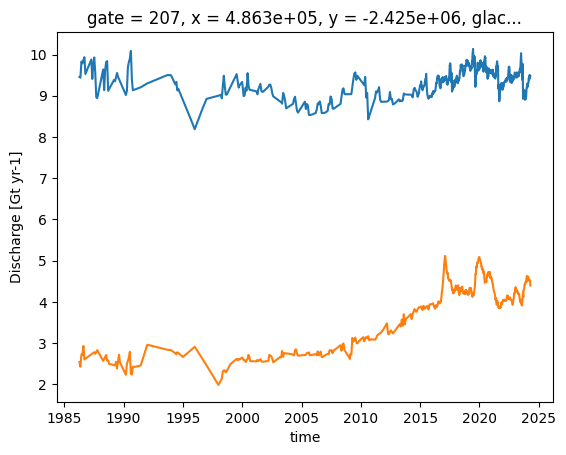

In [40]:
for _, ds in d_ds.groupby("glacier", squeeze=False):
    ds.discharge.plot()